In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


cleaning the data

In [15]:
# delete column   
dataset = dataset.drop(columns=['Id'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# shows the stats
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# simple information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### preprocessing the dataset

In [19]:
# checking for null values
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

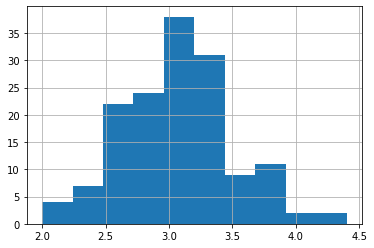

In [20]:
## histograms
#dataset['SepalLengthCm'].hist()
dataset['SepalWidthCm'].hist()
#dataset['PetalLengthCm'].hist()
#dataset['PetalWidthCm'].hist()


In [21]:
## scatterplot
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

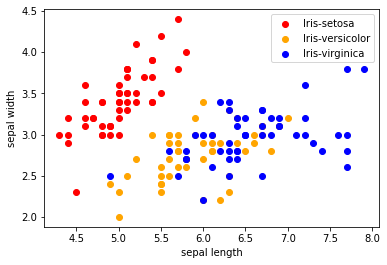

In [28]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i] ,label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()    


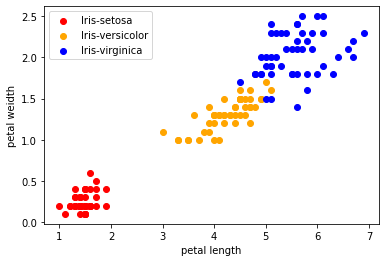

In [29]:
for i in range (3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i], label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal weidth")
plt.legend()

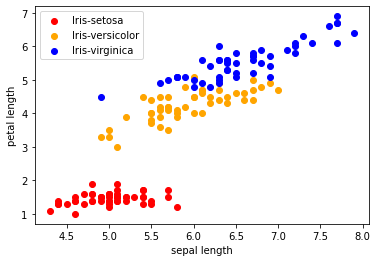

In [32]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i] ,label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()  

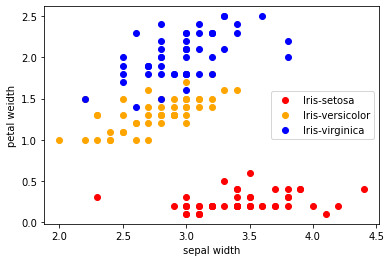

In [35]:
for i in range (3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i], label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal weidth")
plt.legend()

### Correlation Matrix

the value is in range of -1 and 1. If two variables have high correlation, we can neglect one of them

In [36]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
dataset['Species'] = le.fit_transform(dataset['Species'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Training the model

In [59]:
from sklearn.model_selection import train_test_split

x = dataset.drop(columns=['Species'])
y = dataset['Species']
x_train, x_test , y_train ,y_test =train_test_split(x,y, test_size=0.3)

LogisticRegression Model

In [60]:
from sklearn.linear_model import LogisticRegression

# model training using LG
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [61]:
# get the perfomance
print("Accuracy= " , model.score(x_test,y_test)*100)

Accuracy=  95.55555555555556


KNN Model

In [62]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier()

In [63]:
# get the perfomance
print("Accuracy: " ,model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


Decision Tree Model

In [64]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
# Get the perfomance
print("Accuracy: " , model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777
